# Контрольная работа Седов Николай ПМ22-7

датасет - wine_quality

In [65]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
wine_quality = fetch_openml(name='wine_quality', version=1)
data = wine_quality.data
target = wine_quality.target
print(wine_quality.DESCR)


**Author**: Tobias Kuehn  
**Source**: Unknown - 2009  
**Please cite**:   

1. Title: Wine Quality 

2. Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
    
3. Past Usage:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model these datasets under a regression approach. The support vector machine model achieved the best results. Several metrics were computed: MAD, confusion matrix for a fixed error tole

# Задание 2

In [67]:
print(wine_quality.data.describe())

       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [68]:
print(wine_quality.target.value_counts(normalize=True))

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64


# Задание 3

In [69]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_ready = data_imputed
missing_values_after = data_ready.isnull().sum()

missing_values_after

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

# Задание 4

In [70]:
data = data.select_dtypes(include=[float])  
data = data.fillna(data.mean()) 


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(f"R^2 Score: {score}")

R^2 Score: 0.2597673129790181


# Задание 5

In [71]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(0.5466964419580571, 0.5658710079707678, 0.2597673129790181)

# Задание 6.1

In [72]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
roc_auc_ovr = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')

print(f"ROC-AUC (OVR): {roc_auc_ovr}")


ROC-AUC (OVR): 0.6659434147969817


c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Задание 6.2

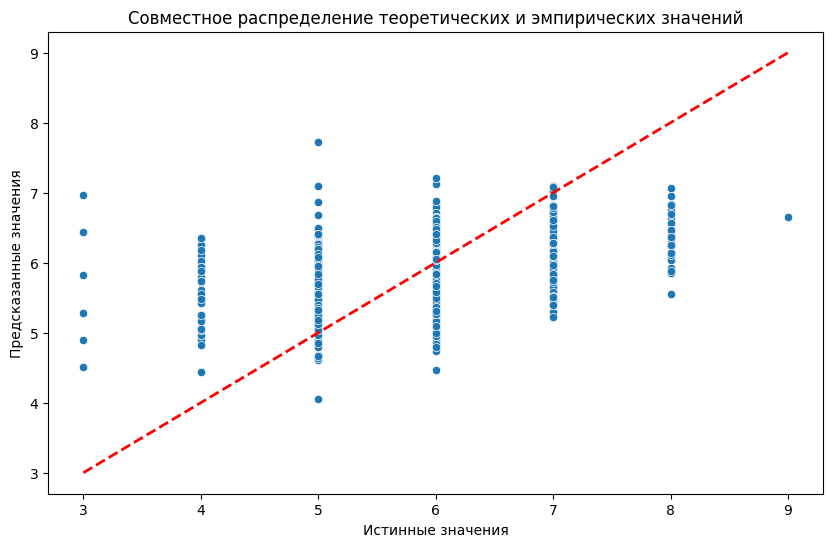

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Совместное распределение теоретических и эмпирических значений')
plt.show()

# Задание 7.1

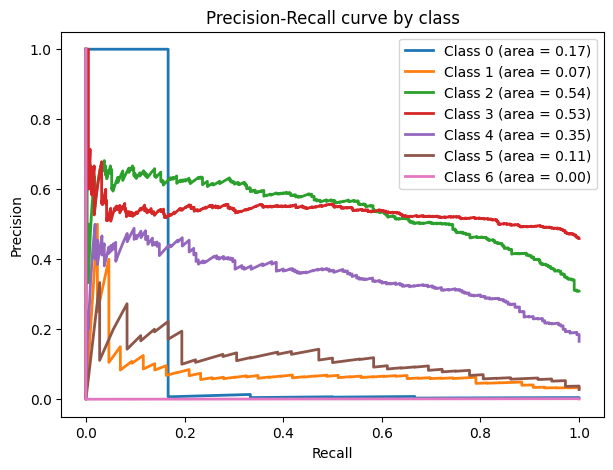

In [74]:


y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

n_classes = y_test_binarized.shape[1]
precision = dict()
recall = dict()
thresholds = dict()
pr_auc = dict()
optimal_thresholds = np.zeros(n_classes)

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (area = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve by class')
plt.legend(loc='best')
plt.show()


# Задание 7.2

In [75]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model_with_normalization = make_pipeline(StandardScaler(), LinearRegression())

model_with_normalization.fit(X_train, y_train)


y_pred_normalized = model_with_normalization.predict(X_test)


r2_score_normalized = r2_score(y_test, y_pred_normalized)

r2_score_normalized


0.25976731297901656

# Задание 8

В кросс-валидации выбор типа разбиения зависит от данных и задачи. Если данные простые и не зависят от времени, используем обычное K-Fold, которое делит данные на несколько частей и помогает проверить модель под разными углами. Если задача классификации и важно, чтобы в каждой части было одинаковое распределение классов, берём Stratified K-Fold, чтобы все было честно. В общем, всё зависит от того, как устроены данные и что мы хотим предсказать.

# Задание 9

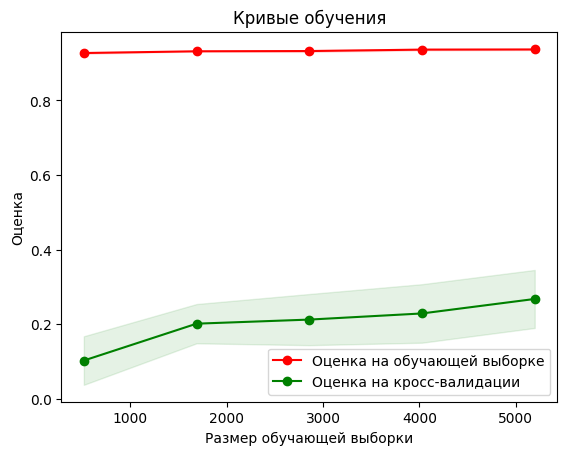

In [76]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(model, data, target, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Кривые обучения")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("Оценка")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Оценка на обучающей выборке")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Оценка на кросс-валидации")
plt.legend(loc="best")
plt.show()


# Задание 10

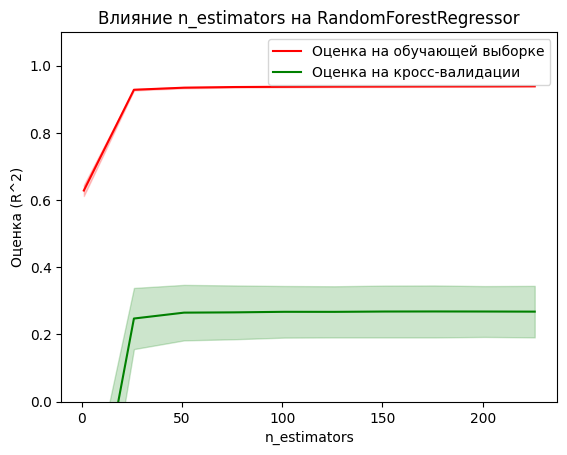

In [78]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 250, 25)


train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=42),
    data, target, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="r2", n_jobs=-1)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Влияние n_estimators на RandomForestRegressor")
plt.xlabel("n_estimators")
plt.ylabel("Оценка (R^2)")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Оценка на обучающей выборке", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.plot(param_range, test_scores_mean, label="Оценка на кросс-валидации", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)
plt.legend(loc="best")
plt.show()
